In [1]:
import os
import torch 

from groundingdino.util.inference import load_model, load_image, predict, annotate

In [2]:
os.environ["CUDA_HOME"] = "/usr/local/cuda-11.7"  
os.environ["PATH"] = "/usr/local/cuda-11.7/bin:" + os.environ["PATH"]
os.environ["LD_LIBRARY_PATH"] = "/usr/local/cuda-11.7/lib64:" + os.environ.get("LD_LIBRARY_PATH", "")

In [3]:
model_config_path = "/scratch/gpfs/eh0560/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
model_weight_path = "/scratch/gpfs/eh0560/imagedeskewing/models/grounding_dino_models/groundingdino_swint_ogc.pth"
model = load_model(model_config_path, model_weight_path)

/home/eh0560/.conda/envs/torch_env/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
def find_images(directory, extension):
    """Returns the abs path to all files with a specified extension in a parent directory"""
    images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                file_path = os.path.join(root, file)
                images.append(file_path)
    return images

In [5]:
tif_image_paths = find_images("/scratch/gpfs/RUSTOW/htr_deskewing_image_dataset/NEED_DESKEWING", ".tif")

In [6]:
image_path = tif_image_paths[10]

In [7]:
image_source, image = load_image(image_path)

In [8]:
TEXT_PROMPT = "document"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)


/home/eh0560/.conda/envs/torch_env/lib/python3.9/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/eh0560/.conda/envs/torch_env/lib/python3.9/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


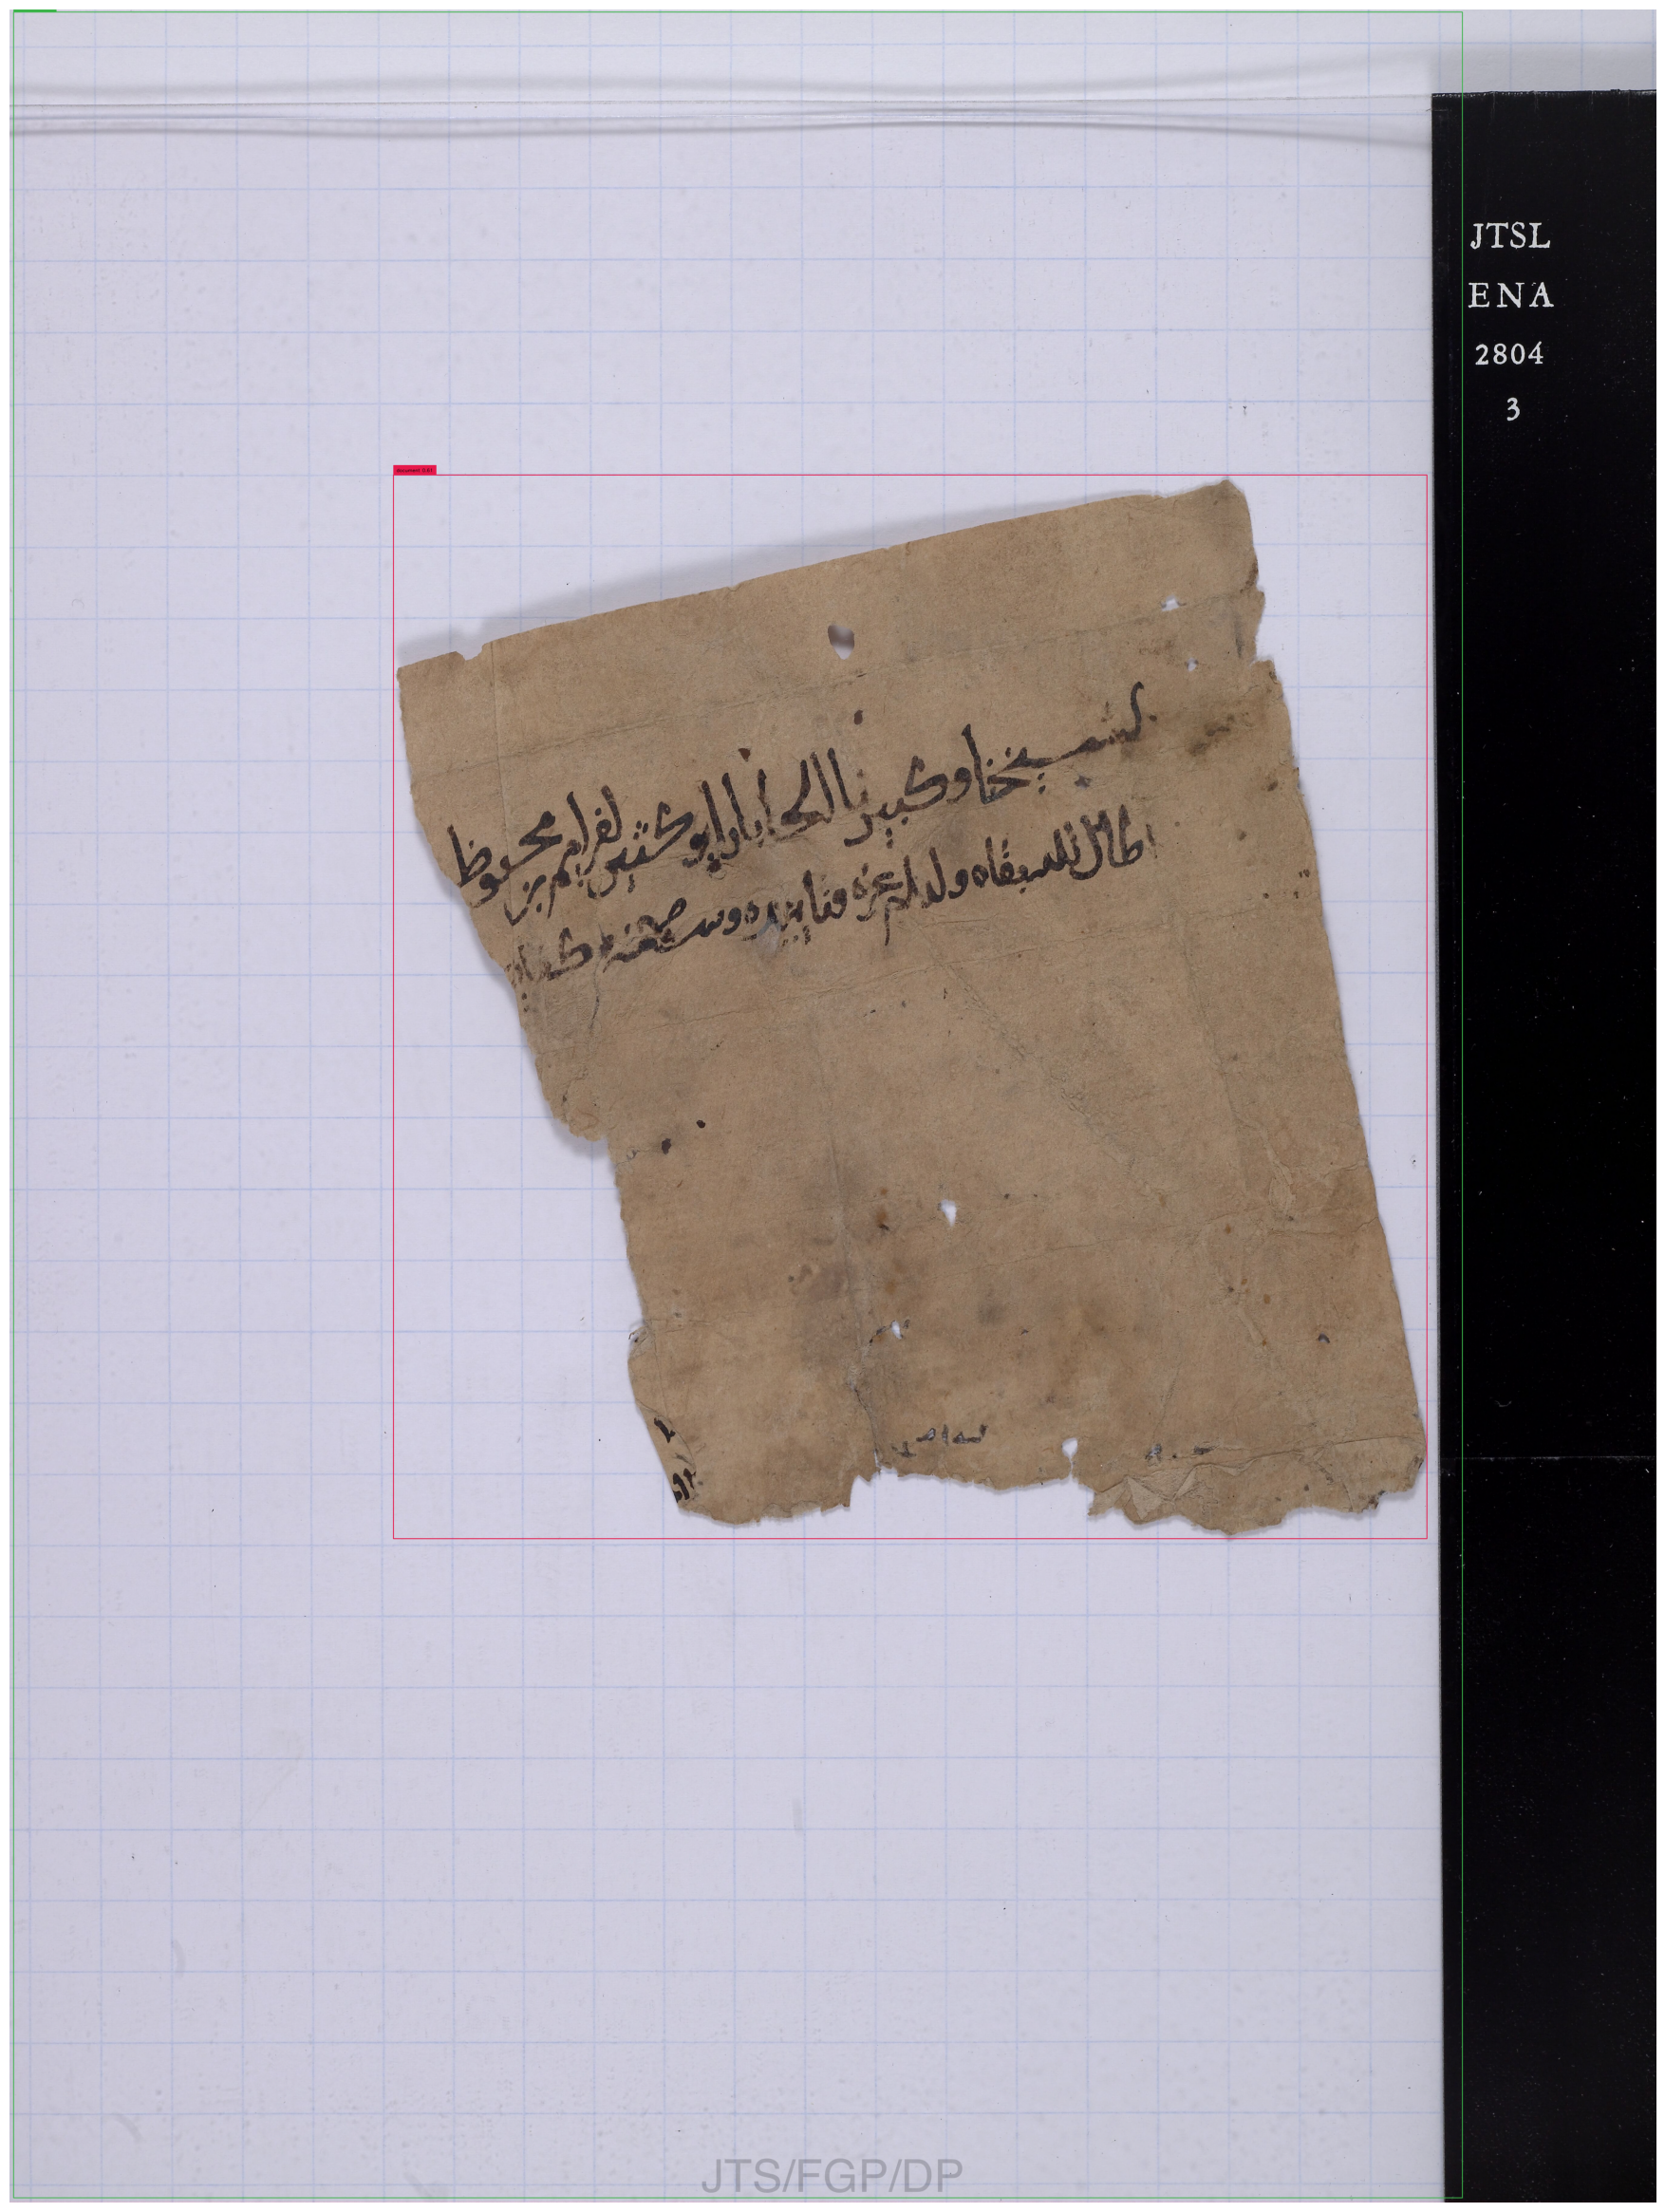

In [10]:
import supervision as sv
%matplotlib inline  
sv.plot_image(annotated_frame, (30, 30))